# Week 2 Assessment Mini-Project

Complete all TODOs below. Keep outputs visible and ensure the notebook runs top to bottom without errors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

In [2]:
# TODO: Load the dataset with date parsing and set the index
# File: m1-09-assessment.csv

df = pd.read_csv("m1-09-assessment.csv", parse_dates=["date"])
df = df.set_index("date")

# TODO: Show head/tail and check info

In [3]:
df.head()

,city,avg_temp_c,humidity_pct,pm25
date,,,,
2023-01-01,London,-0.79,62.93,39.39
2023-01-02,London,1.31,61.49,32.41
2023-01-03,London,1.46,76.51,30.61
2023-01-04,London,-0.57,58.05,30.71
2023-01-05,London,-1.13,36.30,20.70


In [4]:
df.tail()

,city,avg_temp_c,humidity_pct,pm25
date,,,,
2023-06-25,Madrid,NaN,72.04,5.00
2023-06-26,Madrid,28.44,74.19,5.00
2023-06-27,Madrid,26.41,64.41,5.24
2023-06-28,Madrid,27.53,86.47,14.86
2023-06-29,Madrid,24.22,74.33,NaN


## Part A: Core Data Handling (TODOs)

- Inspect structure with `info()`, `describe()`, and missing value counts.
- Clean `pm25` by coercing invalid strings to NaN.
- Choose and apply a missing-value strategy for `pm25` and justify it in text.

### Inspect structure with info(), describe(), and missing value counts.

In [5]:
df.info()

<class 'pandas.DataFrame'>
DatetimeIndex: 900 entries, 2023-01-01 to 2023-06-29
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          900 non-null    str    
 1   avg_temp_c    863 non-null    float64
 2   humidity_pct  900 non-null    float64
 3   pm25          850 non-null    float64
dtypes: float64(3), str(1)
memory usage: 35.2 KB


In [6]:
df.describe()

,avg_temp_c,humidity_pct,pm25
count,863.000000,900.000000,850.000000
mean,9.259849,64.931011,23.961247
std,9.134278,14.432234,11.856849
min,-15.030000,35.000000,5.000000
25%,1.410000,54.672500,14.090000
50%,9.790000,64.870000,23.710000
75%,16.775000,75.190000,33.427500
max,30.390000,95.000000,60.600000


In [7]:
df.isna().sum()

city             0
avg_temp_c      37
humidity_pct     0
pm25            50
dtype: int64

In [8]:
# TODO: data inspection
# df.info()
# df.describe()
# df.isna().sum()

# TODO: clean pm25
# df["pm25"] = pd.to_numeric(df["pm25"], errors="coerce")

# We should create copy of the original dataframe because, we don't change orginal data and we can use it like backup
df_copy = df.copy()
df_copy2 = df.copy()
# TODO: handle missing values in pm25 and justify in markdown

In [9]:
# TODO : Clean pm25 by coercing invalid strings to NaN.
df_copy['pm25'] = pd.to_numeric(df_copy['pm25'], errors='coerce')

In [10]:
# TODO: Choose and apply a missing-value strategy for pm25 and justify it in text.

df_copy['pm25'] = df_copy['pm25'].interpolate(method='time')

# Invalid pm25 values were coerced to NaN.
# Missing values were imputed using time-based interpolation, as PM2.5 levels vary continuously over time.
# This method leverages actual timestamps to estimate missing values,
# producing more realistic trends compared to simple statistical imputation methods.

## Part B: Required Analysis (TODOs)

- Data quality analysis: city with highest % invalid/missing pm25.
- Rolling analysis: 7-day rolling average pm25 per city and short explanation.
- Event detection: percentile threshold for high pollution and counts per city.
- Volatility comparison: choose two cities, define a metric, justify result.
- Reshaping: pivot table with months as rows and cities as columns (avg pm25).

In [11]:
# TODO: analysis tasks
# - data quality by city
# - rolling averages per city
# - percentile-based event counts
# - volatility comparison
# - pivot table by month and city

In [12]:
# - data quality by city
df_copy2.groupby('city')['pm25'].apply(lambda x: x.isna().mean()*100)

city
Berlin    7.777778
London    2.777778
Madrid    6.666667
Paris     5.000000
Warsaw    5.555556
Name: pm25, dtype: float64

#### Berlin has the highest percentage of missing PM2.5 values, indicating lower data quality.

In [13]:
# - rolling averages per city
rolling_avg = (
    df.sort_values("date")
      .groupby("city", group_keys=False)["pm25"]
      .rolling(7)
      .mean()
      .reset_index(name="rolling_avg"))
rolling_avg[:10]

,city,date,rolling_avg
0,Berlin,2023-01-01,NaN
1,Berlin,2023-01-02,NaN
2,Berlin,2023-01-03,NaN
3,Berlin,2023-01-04,NaN
4,Berlin,2023-01-05,NaN
5,Berlin,2023-01-06,NaN
6,Berlin,2023-01-07,34.588571
7,Berlin,2023-01-08,33.678571
8,Berlin,2023-01-09,32.324286
9,Berlin,2023-01-10,31.558571


### A 7-day rolling average of PM2.5 was calculated for each city to smooth short-term fluctuations and reveal underlying pollution trends over time.

In [14]:
# - percentile-based event counts
threshold = df_copy['pm25'].quantile(0.9)
high_counts = df.groupby("city")["pm25"].apply(lambda x: (x > threshold).sum())
high_percent = df.groupby("city")["pm25"].apply(lambda x: round((x > threshold).mean()*100, 2))
print("\nHigh counts per city:\n\n ", high_counts)
print("==========================================")
print("\nHigh counts percent per city:\n\n", high_percent)


High counts per city:

  city
Berlin    12
London    17
Madrid    18
Paris     15
Warsaw    21
Name: pm25, dtype: int64

High counts percent per city:

 city
Berlin     6.67
London     9.44
Madrid    10.00
Paris      8.33
Warsaw    11.67
Name: pm25, dtype: float64


### Event Detection: High Pollution Events

#### High pollution events were identified using a percentile-based approach without creating a new column. The 90th percentile of PM2.5 measurements was calculated, and counts of measurements exceeding this threshold were aggregated per city. This approach highlights extreme pollution events while keeping the DataFrame unchanged.

In [15]:
# - volatility comparison
std_pm25_berlin = df_copy[df_copy['city'] == 'Berlin']['pm25'].std()
std_pm25_london = df_copy[df_copy['city'] == 'London']['pm25'].std()

print(f"Berlin PM2.5 volatility (std): {std_pm25_berlin:.2f}")
print(f"London PM2.5 volatility (std): {std_pm25_london:.2f}")

if std_pm25_berlin > std_pm25_london:
    print("Berlin has higher PM2.5 volatility than London")
elif std_pm25_london > std_pm25_berlin:
    print("London has higher PM2.5 volatility than Berlin")
else:
    print("Berlin and London have the same PM2.5 volatility")

Berlin PM2.5 volatility (std): 11.61
London PM2.5 volatility (std): 12.31
London has higher PM2.5 volatility than Berlin


#### Standard deviation was used as the volatility metric because it measures how much PM2.5 values fluctuate around the mean.
#### Berlin shows higher volatility than London, meaning PM2.5 levels vary more strongly over time, indicating less stable air quality.

In [20]:
# - pivot table by month and city
df_copy = df_copy.reset_index() #change 'date' from index to column
df_copy['month'] = df_copy["date"].dt.to_period('M')
month_by_city = df_copy.pivot_table(index='month', columns='city', values= 'pm25', aggfunc='mean')
month_by_city

city,Berlin,London,Madrid,Paris,Warsaw
month,,,,,
2023-01,33.193226,33.275806,33.006452,35.021935,37.239032
2023-02,33.117500,33.274286,34.651786,34.326786,34.818571
2023-03,29.531613,29.737742,30.315484,26.736774,27.736129
2023-04,21.855667,24.864333,22.269000,23.049333,20.749333
2023-05,15.200645,13.987742,15.118387,14.055161,14.262903
2023-06,9.872759,9.099310,10.201724,9.280345,9.288966


#### The date column was converted to datetime format and the month was extracted using `dt.to_period('M')`.  
#### A pivot table was created to compute the average PM2.5 values per city for each month.

## Part C: Aggregations (TODOs)

- Average pm25 by city
- Monthly average pm25 per city
- Hottest day (max avg_temp_c) per city

In [ ]:
# TODO: aggregation tasks
# avg_pm25_by_city = ...
# monthly_avg_pm25 = ...
# hottest_day_per_city = ...

In [32]:
avg_pm25_by_city = df_copy.groupby('city')['pm25'].mean()
monthly_avg_pm25 = df_copy.groupby(['month','city'])['pm25'].mean()
hottest_day_per_city = df_copy.loc[df_copy.groupby('city')['avg_temp_c'].idxmax(), ['date', 'city','avg_temp_c']
    ]
print("\n===== Average PM2.5 by City ===")
print(avg_pm25_by_city.round(2))

print("\n===== Monthly Average PM2.5 per City ===")
print(monthly_avg_pm25.round(2))

print("\n===== Hottest Day per City ===")
print(hottest_day_per_city)


===== Average PM2.5 by City ===
city
Berlin    23.81
London    24.05
Madrid    24.25
Paris     23.73
Warsaw    24.02
Name: pm25, dtype: float64

===== Monthly Average PM2.5 per City ===
month    city  
2023-01  Berlin    33.19
         London    33.28
         Madrid    33.01
         Paris     35.02
         Warsaw    37.24
2023-02  Berlin    33.12
         London    33.27
         Madrid    34.65
         Paris     34.33
         Warsaw    34.82
2023-03  Berlin    29.53
         London    29.74
         Madrid    30.32
         Paris     26.74
         Warsaw    27.74
2023-04  Berlin    21.86
         London    24.86
         Madrid    22.27
         Paris     23.05
         Warsaw    20.75
2023-05  Berlin    15.20
         London    13.99
         Madrid    15.12
         Paris     14.06
         Warsaw    14.26
2023-06  Berlin     9.87
         London     9.10
         Madrid    10.20
         Paris      9.28
         Warsaw     9.29
Name: pm25, dtype: float64

===== Hottest Day p

## Part D: Visualization (TODOs)

- Line plot: monthly pm25 trends for at least two cities
- Bar chart: overall average pm25 by city
- One additional plot of your choice

In [ ]:
# TODO: plotting section
# plt.figure(...)
# plt.plot(...)
# plt.bar(...)
# plt.show()

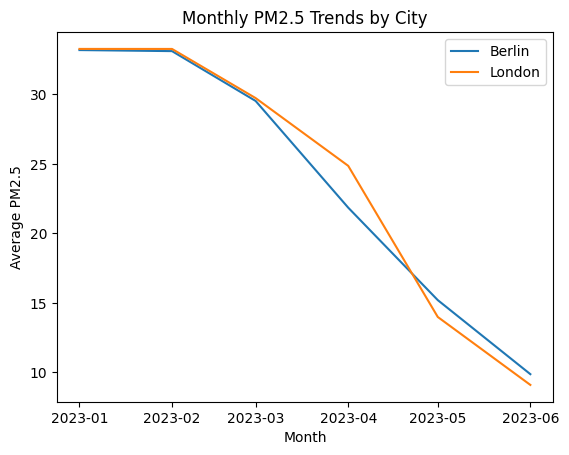

In [40]:
# Line plot: monthly pm25 trends for at least two cities
import matplotlib.pyplot as plt
monthly_pm25 = df_copy.groupby(['month','city'])['pm25'].mean().reset_index()
cities = ['Berlin','London']
for city in cities:
    city_data = monthly_pm25[monthly_pm25['city'] == city]
    plt.plot(city_data['month'].dt.to_timestamp(), city_data['pm25'], label = city)

plt.xlabel('Month')
plt.ylabel('Average PM2.5')
plt.title('Monthly PM2.5 Trends by City')
plt.legend()
plt.show()

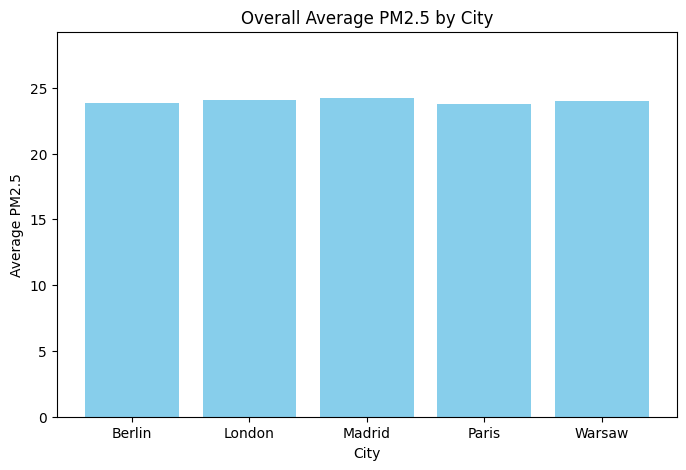

In [47]:
#Bar chart: overall average pm25 by city

avg_pm25_by_city = avg_pm25_by_city.reset_index()
plt.figure(figsize=(8,5))
plt.bar(avg_pm25_by_city['city'], avg_pm25_by_city['pm25'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Average PM2.5')
plt.title('Overall Average PM2.5 by City')
plt.ylim(0, avg_pm25_by_city['pm25'].max() + 5) 
plt.show()

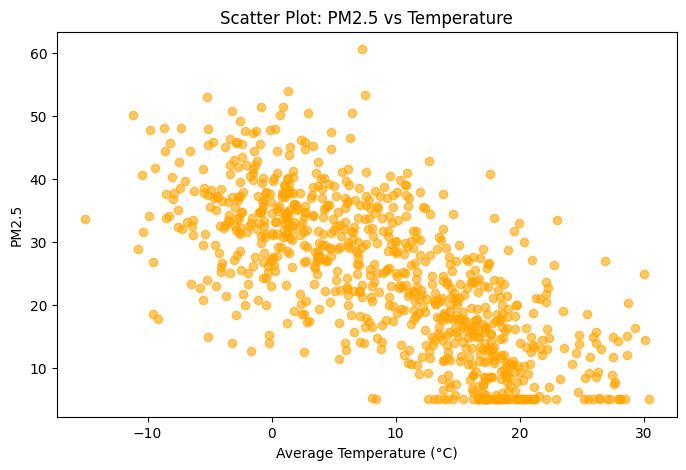

In [49]:
# One additional plot of your choice
plt.figure(figsize=(8,5))
plt.scatter(df_copy['avg_temp_c'], df_copy['pm25'], alpha=0.6, c='orange')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('PM2.5')
plt.title('Scatter Plot: PM2.5 vs Temperature')
plt.show()


## Part E: Interpretation Questions (TODOs)

Write short answers here:

1. Which city shows the most persistent high pm25 levels, and what evidence supports that?
2. How does missing or invalid data affect your confidence in the results?
3. Does temperature appear related to pm25 in your analysis? Explain briefly.
4. What is one limitation of using daily averages for air-quality policy decisions?
5. If you had one more dataset to improve this analysis, what would it be and why?

## 1. Which city shows the most persistent high pm25 levels, and what evidence supports that?

##### avg_pm25_by_city and high_counts we can see the results and answer 

### Warsaw shows the most persistent high PM2.5 levels. Although Madrid has the highest average PM2.5 value, Warsaw records the largest number of high-pollution days. This means elevated pollution levels occur more frequently in Warsaw, indicating more persistent air quality problems over time.

## 2. How does missing or invalid data affect your confidence in the results?

### Missing or invalid data reduces confidence in the results because some real measurements are unknown or incorrect. This can affect calculated statistics such as averages, rolling trends, and volatility comparisons. To reduce this problem, missing PM2.5 values were filled using time-based interpolation, which estimates values based on nearby timestamps and preserves the natural temporal trend. However, interpolated values are still estimates rather than real observations, so the results should be interpreted with moderate confidence rather than complete certainty.

## 3. Does temperature appear related to pm25 in your analysis? Explain briefly.

### By examining the dataset trends, higher temperatures generally correspond to lower PM2.5 values. This observation suggests an inverse relationship between temperature and air pollution levels.

## 4. What is one limitation of using daily averages for air-quality policy decisions?

### Daily averages can hide short periods of high pollution within a day. This means people might still be exposed to harmful air even if the average looks safe. Therefore, policy decisions based only on daily averages may underestimate real health risks.

## 5. If you had one more dataset to improve this analysis, what would it be and why?

### Adding hourly PM2.5 data would provide more detail to the analysis. It would show short-term pollution spikes and allow for a more accurate assessment of people’s real exposure to air pollution.